In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/Users/eshanakshata/Desktop/marketing_campaign (1).xlsx')

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

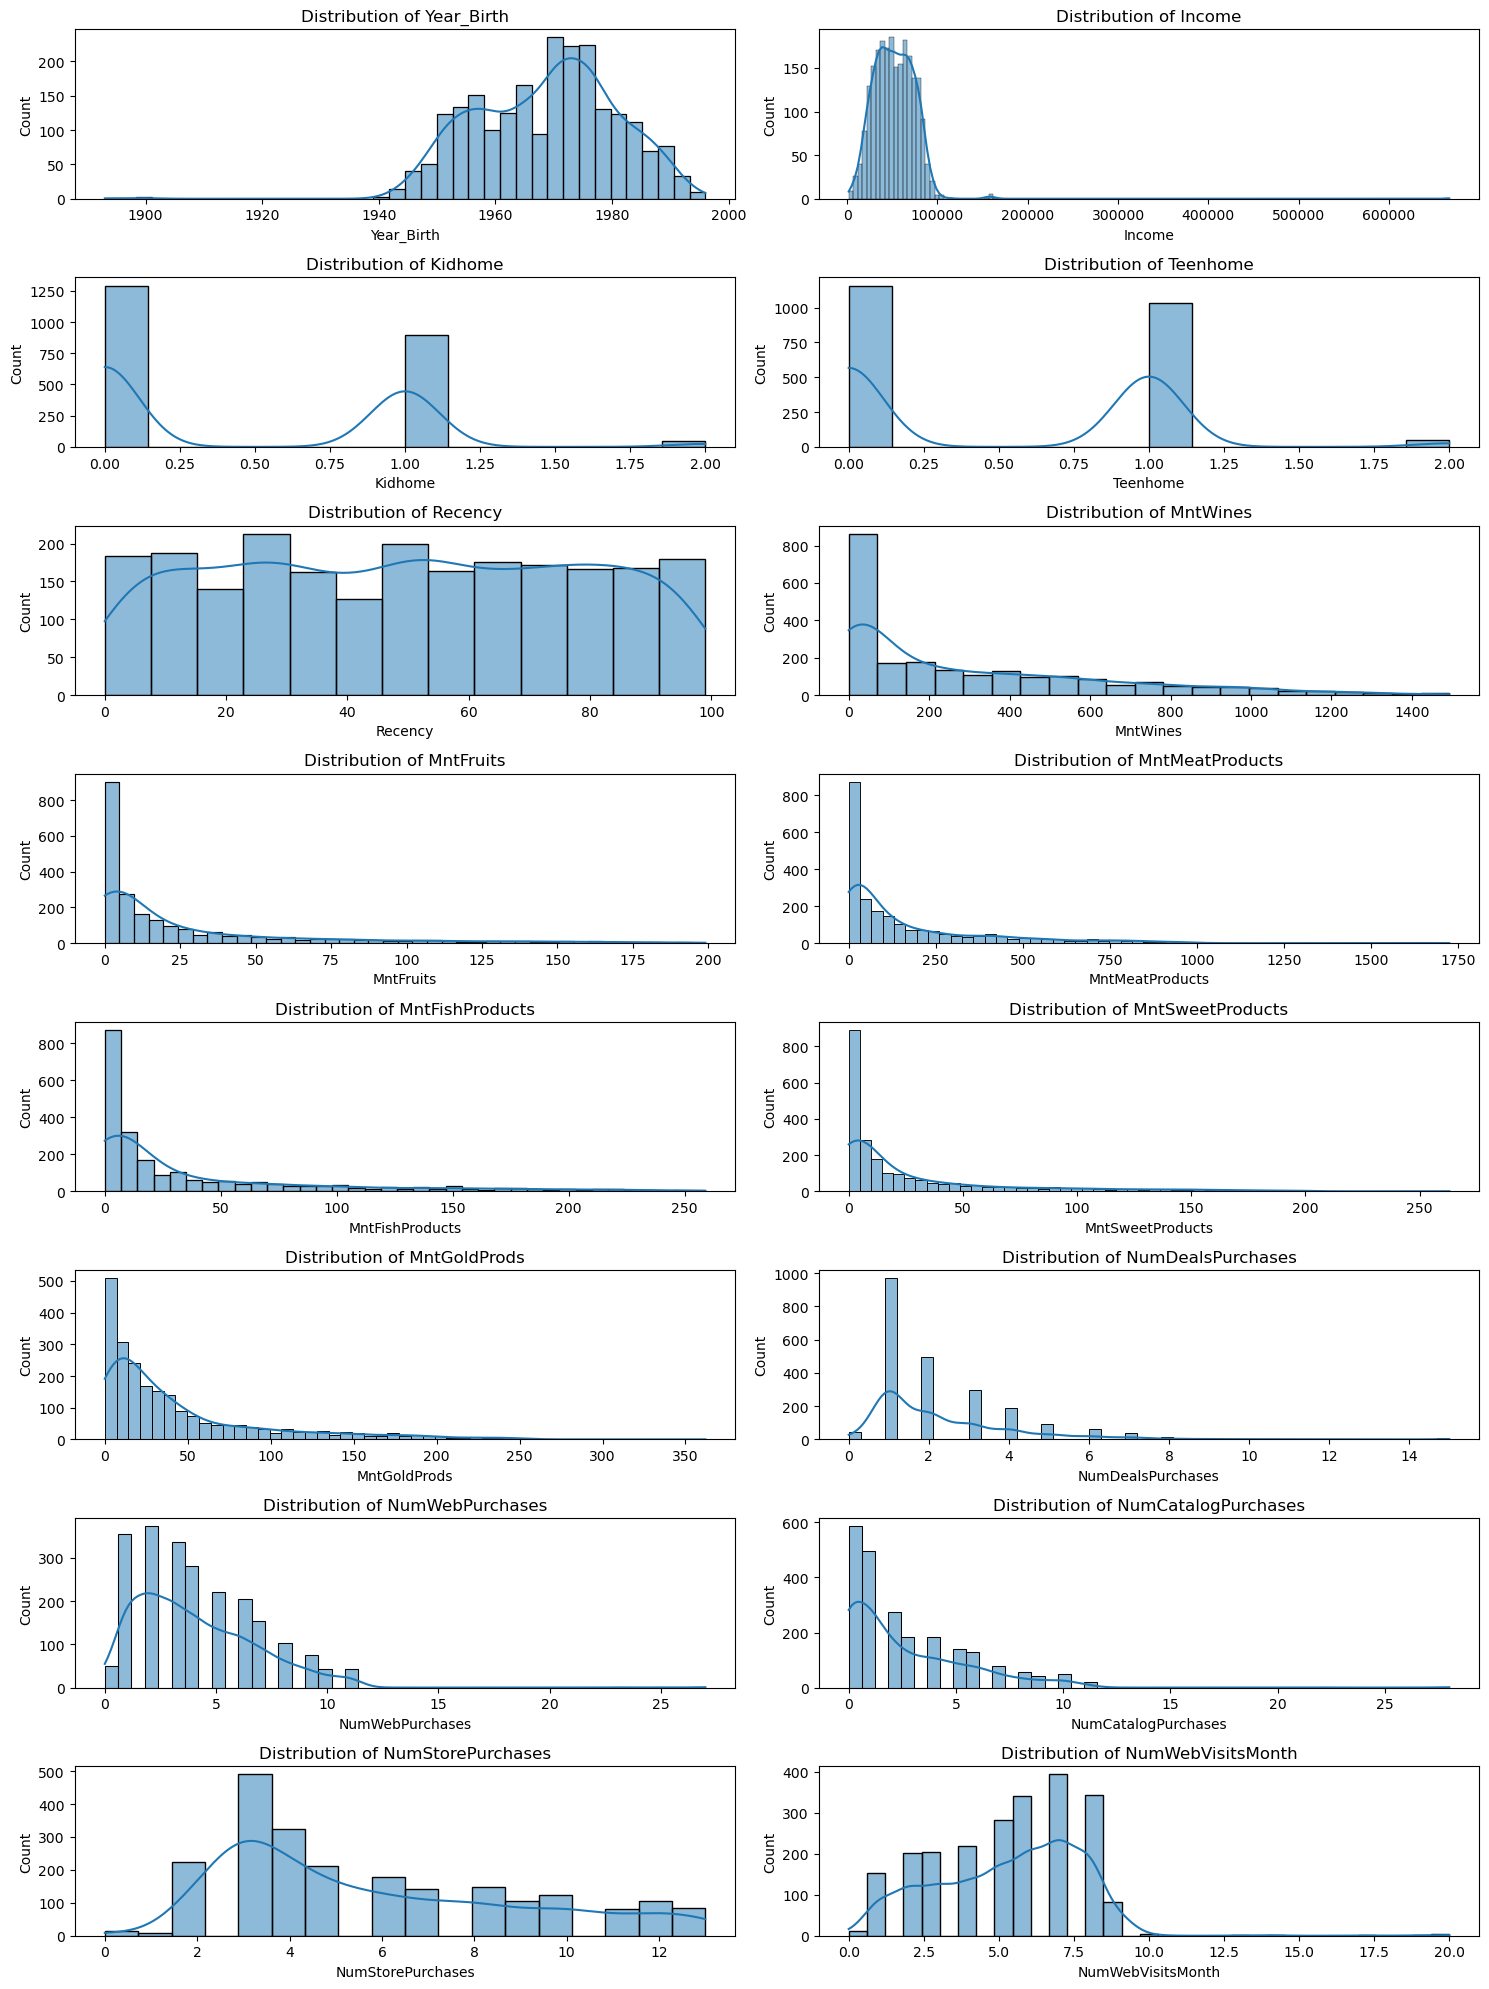

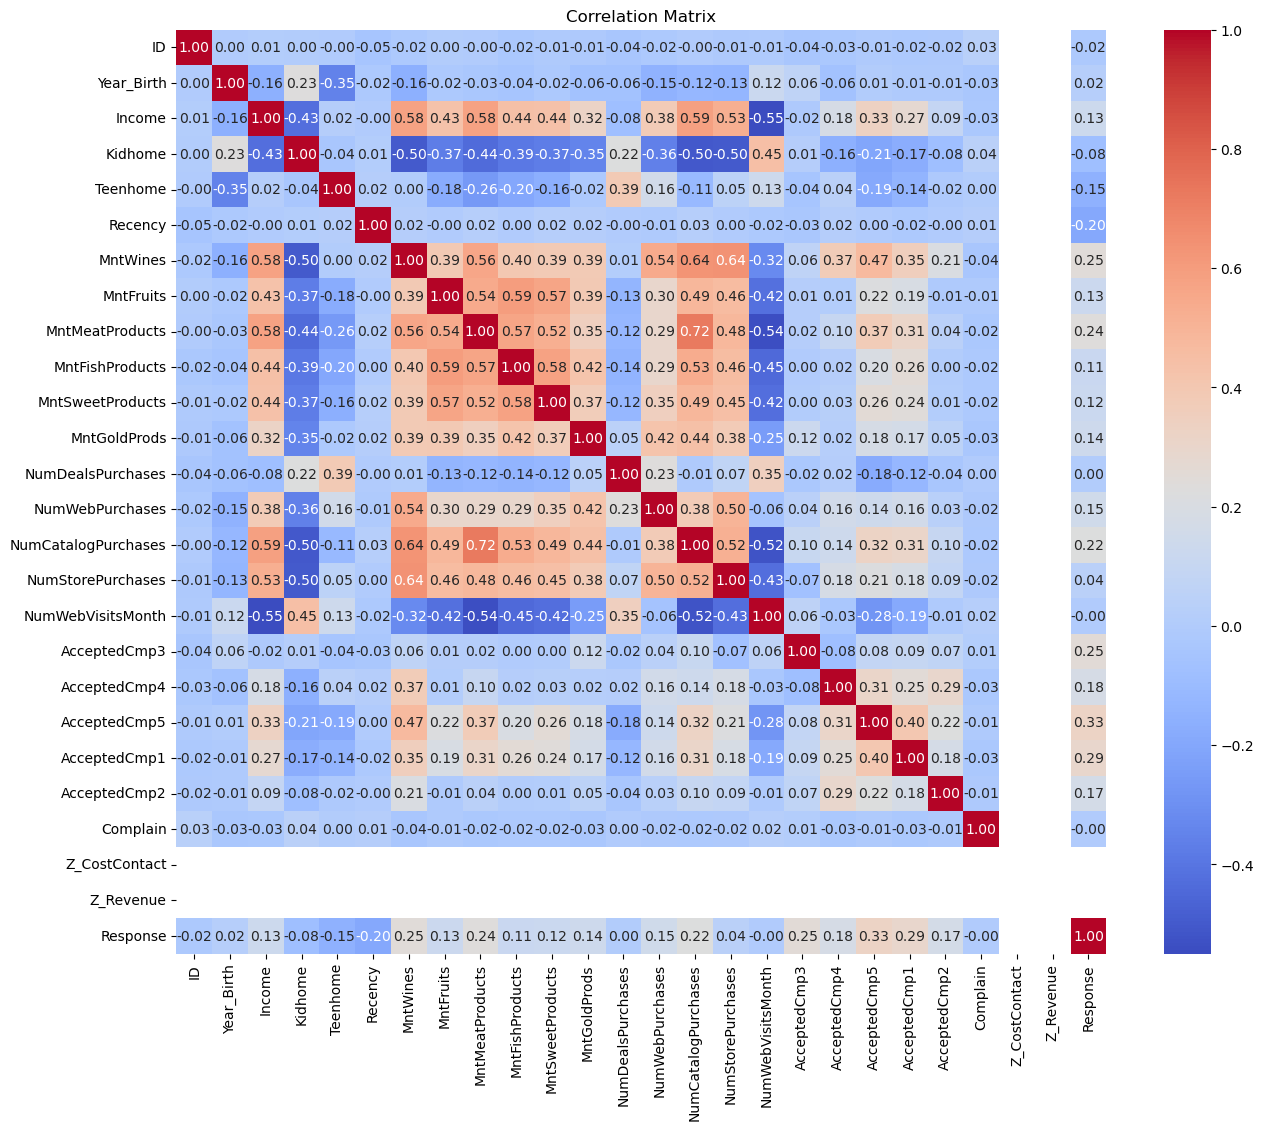

In [4]:
# Display basic information about the dataset
df.info(), df.head()

# Check for missing values
missing_values = df.isnull().sum()

# Get summary statistics for numerical columns
summary_stats = df.describe()

missing_values, summary_stats

# Impute missing values in the Income column with the median
df['Income'] = df['Income'].fillna(df['Income'].median())


# List of numerical columns to visualize
numerical_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                     'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                     'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                     'NumWebVisitsMonth']

# Plot histograms for numerical columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(8, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Generate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Create new features
# Age of the customer
df['Age'] = 2024 - df['Year_Birth']

# Total children in the household
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Total amount spent
df['Total_Spending'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                        df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

# Total purchases
df['Total_Purchases'] = (df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] +
                         df['NumStorePurchases'])

# Customer tenure in days
df['Tenure'] = (pd.to_datetime('2024-01-01') - pd.to_datetime(df['Dt_Customer'])).dt.days

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=False)

# Handle outliers
# Cap the income at the 99th percentile to handle extreme outliers
income_cap = df['Income'].quantile(0.99)
df['Income'] = df['Income'].apply(lambda x: min(x, income_cap))

# Convert Income from float to int64
df['Income'] = df['Income'].astype('int64')

# Select only the necessary columns
columns_to_keep = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
                   'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                   'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                   'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
                   'Age', 'Total_Children', 'Total_Spending', 'Total_Purchases', 'Tenure']

# Get all columns from one-hot encoding
encoded_columns = [col for col in df.columns if col.startswith('Education_') or col.startswith('Marital_Status_')]

# Combine necessary columns with encoded columns
columns_to_keep.extend(encoded_columns)

# Filter the dataframe to keep only the necessary columns
df = df[columns_to_keep]

# Convert boolean columns to int
boolean_columns = df.select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(int)

# Display the first few rows of the dataframe to verify the changes
df.info(), df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   int64         
 1   Year_Birth               2240 non-null   int64         
 2   Income                   2240 non-null   int64         
 3   Kidhome                  2240 non-null   int64         
 4   Teenhome                 2240 non-null   int64         
 5   Dt_Customer              2240 non-null   datetime64[ns]
 6   Recency                  2240 non-null   int64         
 7   MntWines                 2240 non-null   int64         
 8   MntFruits                2240 non-null   int64         
 9   MntMeatProducts          2240 non-null   int64         
 10  MntFishProducts          2240 non-null   int64         
 11  MntSweetProducts         2240 non-null   int64         
 12  MntGoldProds             2240 non-

(None,
      ID  Year_Birth  Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  \
 0  5524        1957   58138        0         0  2012-09-04       58       635   
 1  2174        1954   46344        1         1  2014-03-08       38        11   
 2  4141        1965   71613        0         0  2013-08-21       26       426   
 3  6182        1984   26646        1         0  2014-02-10       26        11   
 4  5324        1981   58293        1         0  2014-01-19       94       173   
 
    MntFruits  MntMeatProducts  ...  Education_Master  Education_PhD  \
 0         88              546  ...                 0              0   
 1          1                6  ...                 0              0   
 2         49              127  ...                 0              0   
 3          4               20  ...                 0              0   
 4         43              118  ...                 0              1   
 
    Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_D

In [6]:
df.dtypes

ID                                  int64
Year_Birth                          int64
Income                              int64
Kidhome                             int64
Teenhome                            int64
Dt_Customer                datetime64[ns]
Recency                             int64
MntWines                            int64
MntFruits                           int64
MntMeatProducts                     int64
MntFishProducts                     int64
MntSweetProducts                    int64
MntGoldProds                        int64
NumDealsPurchases                   int64
NumWebPurchases                     int64
NumCatalogPurchases                 int64
NumStorePurchases                   int64
NumWebVisitsMonth                   int64
AcceptedCmp3                        int64
AcceptedCmp4                        int64
AcceptedCmp5                        int64
AcceptedCmp1                        int64
AcceptedCmp2                        int64
Complain                          

In [7]:
df

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138,0,0,2012-09-04,58,635,88,546,...,0,0,0,0,0,0,1,0,0,0
1,2174,1954,46344,1,1,2014-03-08,38,11,1,6,...,0,0,0,0,0,0,1,0,0,0
2,4141,1965,71613,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,0,0,0,1,0,0
3,6182,1984,26646,1,0,2014-02-10,26,11,4,20,...,0,0,0,0,0,0,0,1,0,0
4,5324,1981,58293,1,0,2014-01-19,94,173,43,118,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223,0,1,2013-06-13,46,709,43,182,...,0,0,0,0,0,1,0,0,0,0
2236,4001,1946,64014,2,1,2014-06-10,56,406,0,30,...,0,1,0,0,0,0,0,1,0,0
2237,7270,1981,56981,0,0,2014-01-25,91,908,48,217,...,0,0,0,0,1,0,0,0,0,0
2238,8235,1956,69245,0,1,2014-01-24,8,428,30,214,...,1,0,0,0,0,0,0,1,0,0


In [8]:
df

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138,0,0,2012-09-04,58,635,88,546,...,0,0,0,0,0,0,1,0,0,0
1,2174,1954,46344,1,1,2014-03-08,38,11,1,6,...,0,0,0,0,0,0,1,0,0,0
2,4141,1965,71613,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,0,0,0,1,0,0
3,6182,1984,26646,1,0,2014-02-10,26,11,4,20,...,0,0,0,0,0,0,0,1,0,0
4,5324,1981,58293,1,0,2014-01-19,94,173,43,118,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223,0,1,2013-06-13,46,709,43,182,...,0,0,0,0,0,1,0,0,0,0
2236,4001,1946,64014,2,1,2014-06-10,56,406,0,30,...,0,1,0,0,0,0,0,1,0,0
2237,7270,1981,56981,0,0,2014-01-25,91,908,48,217,...,0,0,0,0,1,0,0,0,0,0
2238,8235,1956,69245,0,1,2014-01-24,8,428,30,214,...,1,0,0,0,0,0,0,1,0,0


0
Inertia: 2732.673145632094
Silhouette Score: 0.47687324032312806

Decision Tree Performance:
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       247
         1.0       1.00      1.00      1.00       978
         2.0       1.00      1.00      1.00      1015

    accuracy                           1.00      2240
   macro avg       1.00      1.00      1.00      2240
weighted avg       1.00      1.00      1.00      2240

Confusion Matrix:
[[ 247    0    0]
 [   0  978    0]
 [   0    0 1015]]

Logistic Regression Performance:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       247
         1.0       1.00      1.00      1.00       978
         2.0       1.00      1.00      1.00      1015

    accuracy                           1.00      2240
   macro avg       1.00      0.99      0.99      2240
weighted avg       1.00      1.00      1.00  

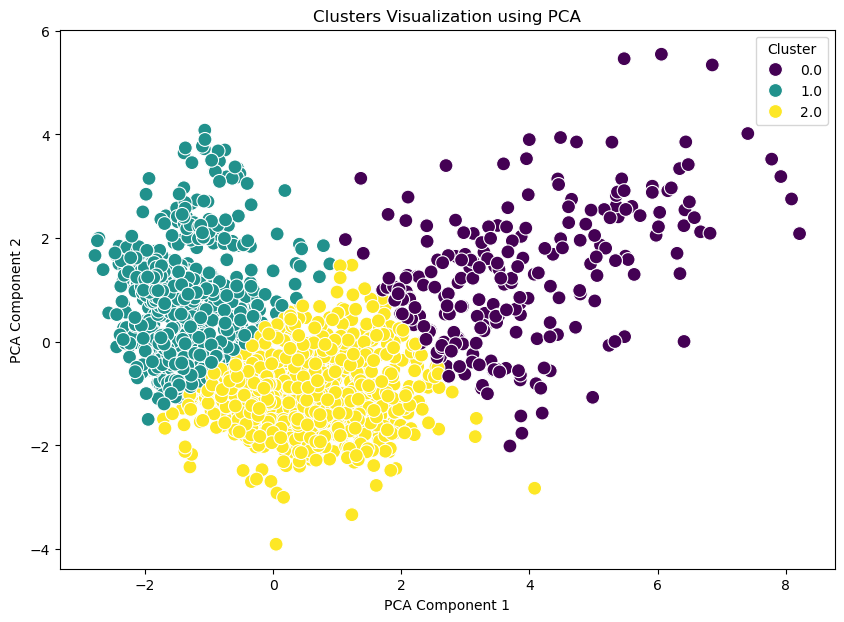

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster
0,5524,1957,58138,0,0,2012-09-04,58,635,88,546,...,0,0,0,0,0,1,0,0,0,2.0
1,2174,1954,46344,1,1,2014-03-08,38,11,1,6,...,0,0,0,0,0,1,0,0,0,1.0
2,4141,1965,71613,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,0,0,1,0,0,2.0
3,6182,1984,26646,1,0,2014-02-10,26,11,4,20,...,0,0,0,0,0,0,1,0,0,1.0
4,5324,1981,58293,1,0,2014-01-19,94,173,43,118,...,1,0,0,0,1,0,0,0,0,1.0


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


# Preprocess the dataset
# Fill missing values with the median value of each column
df.fillna(df.median(), inplace=True)

# Standardize the data
features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
            'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
            'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train_idx, y_test_idx = train_test_split(X_pca, df.index, test_size=0.2, random_state=42)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

# Create a single column for clusters
df['Cluster'] = np.nan

# Update cluster labels in the DataFrame
df.loc[df.index.isin(y_train_idx), 'Cluster'] = pd.Series(train_clusters, index=y_train_idx)
df.loc[df.index.isin(y_test_idx), 'Cluster'] = pd.Series(test_clusters, index=y_test_idx)

# Verify that there are no NaN values
print(df['Cluster'].isna().sum())

# Save the scaler, PCA, and KMeans model in the current working directory
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')
joblib.dump(kmeans, 'kmeans.pkl')

# Evaluate the clustering model
# Calculate Inertia
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_train, train_clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Prepare target variable for clustering
y_clusters = df.loc[df.index.isin(y_train_idx.append(y_test_idx)), 'Cluster']

# Initialize classifiers
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, kernel='linear')  # Use 'linear' kernel for multi-class classification
}

# Fit and evaluate each model
for name, model in models.items():
    model.fit(X_pca, y_clusters)
    y_pred = model.predict(X_pca)
    
    print(f"\n{name} Performance:")
    print(f"Classification Report:\n{classification_report(y_clusters, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_clusters, y_pred)}")

# Save the models
joblib.dump(models['Decision Tree'], 'decision_tree_model.pkl')
joblib.dump(models['Logistic Regression'], 'logistic_regression_model.pkl')
joblib.dump(models['Random Forest'], 'random_forest_model.pkl')
joblib.dump(models['SVM'], 'svm_model.pkl')

# Visualize the PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', s=100, marker='o')

plt.title('Clusters Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()

df.head()

